In [1]:
%matplotlib inline

In [2]:
from random import randint
import matplotlib.pyplot as plt
from collections import defaultdict

# All of Statistics exercise 1.22

Define two sets A and B containing integers between 1 and 6, e.g. $\{1, 2, 3, 4\}$ and $\{2, 4, 6\}$

Roll a dice, check which sets it is in.

If $\Pr(\textrm{dice} \in A)$ and $\Pr(\textrm{dice} \in B)$ are independent, then $\Pr(AB) = \Pr(A)\Pr(B)$, and we can show this experimentally

In [3]:
def draw(A=None, B=None):
    pick = randint(1, 6)
    return pick in A, pick in B

def single_experiment(A, B, N=100):
    a_n = 0
    b_n = 0
    a_b = 0
    for i in range(N):
        a, b = draw(A, B)
        if a: a_n += 1
        if b: b_n += 1
        if a and b: a_b += 1
    return a_n/N, b_n/N, a_b/N, (a_n * b_n)/ N**2

def plot_experiments(A, B):
    y = range(10, 10000, 100)
    x = [(x[2], x[3]) for x in (single_experiment(A, B, N=i) for i in y)]
    print("A = %s" % A)
    print("B = %s" % B)
    print("P(A) = %s/6" % len(A))
    print("P(B) = %s/6" % len(B))
    print("P(AB) = %s/6" % len(A & B))
    print("P(A)P(B) = %s/6" % ((len(A)/6 * len(B)/6)*6))
    plt.plot(y, x)
    plt.show()
    
def plot_table(A, B):
    for i in range(1, 7):
        inA = "===" if i in A else "   "
        inB = "===" if i in B else "   "
        print("{inA}{x}{inA} | {inB}{x}{inB}".format(inA = inA, inB=inB, x=i))


Different configurations of A and B may or may not produce independent random variables for $\Pr(\textrm{dice} \in A)$ and $\Pr(\textrm{dice} \in B)$.

In this example, the variables are independant even though the sets are different.

A = {1, 2, 3, 4}
B = {2, 4, 6}
P(A) = 4/6
P(B) = 3/6
P(AB) = 2/6
P(A)P(B) = 2.0/6


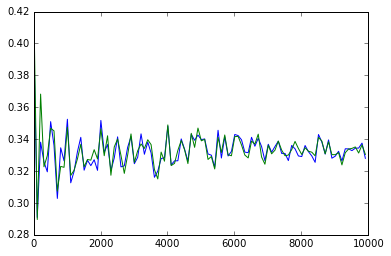

In [4]:
plot_experiments({1, 2, 3, 4}, {2, 4, 6})

Just removing "1" from set A removes the independence

A = {2, 3, 4}
B = {2, 4, 6}
P(A) = 3/6
P(B) = 3/6
P(AB) = 2/6
P(A)P(B) = 1.5/6


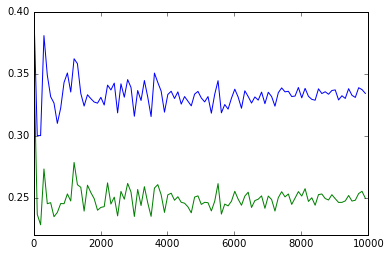

In [5]:
plot_experiments({2, 3, 4}, {2, 4, 6})

This makes more intuitive sense if you look at the sets as a table, and consider the probability of $B$ when it is known that $x \in A$...

In the first case, $\Pr(x \in B) = \frac{1}{2}$ regardless of whether or not we know that $x \in A$.

In [6]:
plot_table({1, 2, 3, 4}, {2, 4, 6})

===1=== |    1   
===2=== | ===2===
===3=== |    3   
===4=== | ===4===
   5    |    5   
   6    | ===6===


In this case, knowing that $x \in A$ increases $\Pr(x \in B)$ to $\frac{2}{3}$

In [7]:
plot_table({2, 3, 4}, {2, 4, 6})

   1    |    1   
===2=== | ===2===
===3=== |    3   
===4=== | ===4===
   5    |    5   
   6    | ===6===
